# Analysis
## Constructing the sample
Datasets are pre-processed into nicely formatted CSVs in other notebooks also on this repo. 

In [1]:
import pandas as pd
import statsmodels.api as sm
import geopandas
import numpy as np

In [2]:
pop_regions = pd.read_csv("pop_regions_with_school.csv")
# Dropping hexes that are assigned to schools more than 50 kilometres away. While it's conceivable that students would travel 50km if it is the closest school, I want to avoid the case where such distances 
# causes parents to home school instead or send kids to some equivalent schooling that is not reflected in this data. 
pop_regions_filtered = pop_regions[pop_regions["DISTANCE"] < 50]
pop_regions_with_dummies = pd.get_dummies(pop_regions_filtered, columns=["Combined_Max_Threshold-Combine_Seuil_Max"], prefix="combined")
pop_regions_with_dummies

,Unnamed: 0,PHH_ID,Type,Pop2016,TDwell2016_TLog2016,URDwell2016_RH2016,DBUID_Ididu,HEXUID_IdUHEX,Pruid_Pridu,Latitude,...,Wired_Max_Threshold-Filaire_Seuil_Max,Wireless_Max_Threshold-Sans_fil_Seuil_Max,Avail_LTE_Mobile_Dispo,DISTANCE,SCHOOL_NUMBER,combined_10_2,combined_25_5,combined_50_10,combined_5_1,combined_<5_1
0,12976,4966173,3,3.875229,1.365138,1.188991,59150968013,BC49251232,59,49.257718,...,50_10,5_1,1,0.988530,3939006,0,0,1,0,0
1,12977,4957793,4,21.000000,9.000000,7.750000,59150591005,BC49251232,59,49.257987,...,50_10,5_1,1,0.972418,3939006,0,0,1,0,0
2,12978,5015696,3,8.061241,4.964545,4.669621,59152437024,BC49231226,59,49.213994,...,50_10,NaN,1,1.532213,4242038,0,0,1,0,0
3,12979,5015622,4,27.385336,16.750697,16.385560,59152436001,BC49231226,59,49.213935,...,50_10,NaN,1,1.502037,4242038,0,0,1,0,0
4,12980,5115114,3,19.383687,7.698206,7.540294,59170731001,BC48591234,59,48.591087,...,50_10,NaN,1,8.820649,6363022,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420586,661348,5500963,2,7.049180,11.311475,3.770492,59030228033,BC49461168,59,49.469820,...,5_1,<5_1,1,36.526037,807013,0,0,0,1,0
420589,661351,5500966,2,5.075000,2.887500,2.275000,59030137019,BC49931174,59,49.904697,...,NaN,NaN,1,45.302126,807013,0,0,0,0,0
420590,661353,5500968,2,4.068966,4.068966,1.908046,59070135043,BC49611204,59,49.618459,...,NaN,<5_1,0,49.891046,6777002,0,0,0,0,1
420592,661355,5500970,2,1.158730,0.380952,0.380952,59070148002,BC49231200,59,49.223080,...,NaN,25_5,1,11.142875,5316004,0,1,0,0,0


In [50]:
mean_combined_speed = pop_regions_with_dummies.groupby(["SCHOOL_NUMBER"])["combined_25_5", "combined_50_10", "combined_5_1", "combined_10_2", "combined_<5_1"].mean().reset_index()
mean_combined_speed 

/tmp/ipykernel_5319/159326075.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_combined_speed = pop_regions_with_dummies.groupby(["SCHOOL_NUMBER"])["combined_25_5", "combined_50_10", "combined_5_1", "combined_10_2", "combined_<5_1"].mean().reset_index()


,SCHOOL_NUMBER,combined_25_5,combined_50_10,combined_5_1,combined_10_2,combined_<5_1
0,502001,0.039,0.709,0.130,0.015,9.218e-02
1,505033,0.062,0.923,0.006,0.000,0.000e+00
2,505034,0.201,0.696,0.087,0.000,2.362e-03
3,505035,0.126,0.795,0.005,0.000,0.000e+00
4,603008,0.148,0.619,0.134,0.000,3.264e-02
...,...,...,...,...,...,...
230,8585026,0.036,0.583,0.022,0.112,2.019e-01
231,9156002,0.444,0.242,0.016,0.068,3.043e-03
232,9156007,0.253,0.431,0.002,0.266,0.000e+00
233,9191023,0.540,0.246,0.040,0.034,6.485e-04


In [4]:
school_data = pd.read_csv("combined_school_report.csv")
# Only consider school data from 2019
school_data_2019 = school_data[school_data["YEAR"] == 2019]
school_data_2019_dummies = pd.get_dummies(school_data_2019, columns=["SCHOOL_TYPE"], prefix="type", drop_first=True)

merged = school_data_2019_dummies.merge(mean_combined_speed, left_on="SCHOOL_NUMBER", right_on="SCHOOL_NUMBER")
merged

,Unnamed: 0,SCHOOL_YEAR,SCHOOL_NUMBER,SCHOOL_NAME,DISTRICT_NUMBER,DISTRICT_NAME,PUBLIC_OR_INDEPENDENT,STREET_ADDRESS,PHYSICAL_ADDRESS_CITY,FACILTY_TYPE,...,PERCENT_EXAMS_FAILED,PERCENT_GRAD,PERCENT_DELAYED,OVERALL,type_Public,combined_25_5,combined_50_10,combined_5_1,combined_10_2,combined_<5_1
0,4,2019/2020,502001,Mount Baker Secondary,5,Southeast Kootenay,Public,1410 Baker St,Cranbrook,Standard School,...,8.8,99.6,7.3,6.7,1,0.038873,0.709497,0.130121,0.014665,0.092179
1,9,2019/2020,505033,Elkford Elementary Secondary,5,Southeast Kootenay,Public,PO Box 910,Elkford,Standard School,...,6.5,94.6,10.2,4.6,1,0.062500,0.923295,0.005682,0.000000,0.000000
2,14,2019/2020,505034,Fernie Secondary,5,Southeast Kootenay,Public,PO Box 370,Fernie,Standard School,...,4.7,100.0,5.9,5.2,1,0.201228,0.695796,0.086915,0.000000,0.002362
3,19,2019/2020,505035,Sparwood Secondary,5,Southeast Kootenay,Public,PO Box 67,Sparwood,Standard School,...,6.4,95.0,11.3,4.9,1,0.125948,0.795144,0.004552,0.000000,0.000000
4,24,2019/2020,603008,Selkirk Secondary School,6,Rocky Mountain,Public,405 Halpin St,Kimberley,Standard School,...,7.4,98.4,10.7,6.3,1,0.148387,0.618975,0.134345,0.000000,0.032638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1154,2019/2020,8585026,Port Hardy Secondary,85,Vancouver Island North,Public,PO Box 27,Port Hardy,Standard School,...,24.2,91.2,35.0,0.7,1,0.036019,0.582938,0.021801,0.111848,0.201896
231,1159,2019/2020,9156002,Fraser Lake Elem-Secondary,91,Nechako Lakes,Public,PO Bag Service 1002,Fraser Lake,Standard School,...,31.4,100.0,19.9,2.1,1,0.444219,0.242394,0.016227,0.067951,0.003043
232,1164,2019/2020,9156007,Fort St James Secondary,91,Nechako Lakes,Public,PO Box 220,Fort St James,Standard School,...,25.7,97.4,42.8,0.0,1,0.253039,0.430939,0.002210,0.266298,0.000000
233,1169,2019/2020,9191023,Lakes District Secondary,91,Nechako Lakes,Public,Box 3000,Burns Lake,Standard School,...,10.9,90.0,16.0,5.1,1,0.539559,0.245785,0.039559,0.033722,0.000649


## Descriptive Statistics
### School Data
School level data is shown in the table below. Looking at year 2019, there are 235 schools in consideration. The explanatory variables of particular interest are the school type, percent of ESL students, percent of special needs student, and school location. The primary response variable is the average mark, with overall rating also available. I'm choosing average exam mark because overall rating is computed using an unknown methodology that already considers some of the explanatory variables, so to avoid spurious correlation average exam mark seems to be a better choice.

In [5]:
merged[["type_Public", "PERCENT_ESL", "PERCENT_SPECIAL_NEEDS", "AVERAGE_EXAM_MARK"]].describe()

,type_Public,PERCENT_ESL,PERCENT_SPECIAL_NEEDS,AVERAGE_EXAM_MARK
count,235.000000,235.000000,235.000000,235.000000
mean,0.842553,3.379574,11.887234,69.148085
std,0.364999,4.283132,4.780007,4.837914
min,0.000000,0.000000,0.000000,54.200000
25%,1.000000,0.150000,8.900000,66.300000
50%,1.000000,1.900000,11.500000,68.600000
75%,1.000000,5.100000,14.650000,71.650000
max,1.000000,21.400000,29.100000,85.400000


We can see that the average school has 3.38% ESL speakers and 11.89% special needs students. Since these students may require additional resources that some schools may find hard to provide, I'm expecting this variable to play a part in average exam marks as students without the necessary resources to succeed will do poorly on exams. 


We can see that 84% of schools are public schools, with 16% being independently run. The assumption is that independent schools are often much better equipped and feature children from much more privileged backgrounds. Since these schools charge tuition and the students are typically wealthy, they have access to much better resources and are therefore generally able to perform better on standardized exams. We can see that more clearly here:

In [6]:
merged.groupby("type_Public")[["AVERAGE_EXAM_MARK"]].describe()

AVERAGE_EXAM_MARK                                               \
                        count       mean       std   min   25%   50%   75%   
type_Public                                                                  
0                        37.0  75.989189  5.281613  67.2  72.1  75.9  80.2   
1                       198.0  67.869697  3.503021  54.2  65.8  67.9  70.2   

                   
              max  
type_Public        
0            85.4  
1            75.9

Indeed this is what we observe, so this will be a useful control. It is also worth observing that the average exam mark is very tightly spread around the mean. This can be explained by the way the sample is constructed: we are taking the average exam mark of students from each school, and then averaging across schools. With this level of aggregation, the underlying data contains hundreds of records, so the distribution is well behaved. 

### Bandwidth data
Bandwidth data is collected over a hexagonal grid of Canada, with each hex around 25 km in area. While the dataset contains data separating into wired, wireless, and LTE availability, we can start by just looking at the max combined speed that is available in each hex. Looking at the descriptive statistics table first:

In [7]:
pop_regions_with_dummies[["combined_25_5", "combined_50_10", "combined_5_1", "combined_10_2", "combined_<5_1"]].describe()

,combined_25_5,combined_50_10,combined_5_1,combined_10_2,combined_<5_1
count,397597.000000,397597.000000,397597.000000,397597.000000,397597.000000
mean,0.060119,0.840874,0.028836,0.016512,0.010541
std,0.237707,0.365794,0.167345,0.127433,0.102126
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the speeds in British Columbia are generally quite good, with most regions supporting 50 Mbps download/10 Mbps upload. Plotting it on a map:

In [23]:
grid_gdf = geopandas.read_file("raw/NBG_Grid/CCP_Hex_UCB.SHP")
grid_gdf.columns

Index(['LAYER', 'HEXuid_HEX', 'ISPName_No', 'Technology', 'Technologi',
       'CLOSED', 'BORDER_STY', 'BORDER_COL', 'BORDER_WID', 'FILL_STYLE',
       'geometry'],
      dtype='object')

## Base case OLS
As a first step we can run a simple OLS with controls (final paper will have results without controls as well). I'm omitting one level (less than 5/1 connection speed) since otherwise we will encounter multi-collinearity as the explanatory variables will sum to 1. 

In [10]:
X = merged[["combined_25_5", "combined_50_10", "combined_5_1", "combined_10_2", "type_Public", "PERCENT_ESL", "PERCENT_SPECIAL_NEEDS"]]
Y = merged[["AVERAGE_EXAM_MARK"]]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      AVERAGE_EXAM_MARK   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     32.31
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           6.47e-31
Time:                        11:10:16   Log-Likelihood:                -622.19
No. Observations:                 235   AIC:                             1260.
Df Residuals:                     227   BIC:                             1288.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    74.1501      4.223     17.558      0.000      65.828      82.472
combined_25_5            -0.3483      6.071     -0.057      0.954     -12.312      11.615
combined_50_10            4.1084      4.132      0.994      0.321      -4.033      12.250
combined_5_1              2.3849      6.453      0.370      0.712     -10.330      15.100
combined_10_2             0.2701      7.548      0.036      0.971     -14.603      15.143
type_Public              -5.2670      0.750     -7.025      0.000      -6.744      -3.790
PERCENT_ESL              -0.1238      0.057     -2.166      0.031      -0.236      -0.011
PERCENT_SPECIAL_NEEDS    -0.3223      0.059     -5.433      0.000      -0.439      -0.205
==============================================================================
Omnibus:                        3.232   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                3.693
Skew:                           0.004   Prob(JB):                        0.158
Kurtosis:                       3.614   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Base result is uninispiring: we have no significance on any of our explanatory variables. While the variance explained is nearly 50%, it seems to be mostly driven by our controls. One reason this might be is because we have too many explanatory variables and there is no significant effect when distinguishing so finely. This is also intuitive from context, since our primary concern is bandwidth that is too low to support video content for education, there should not be much difference between 25/5 and 50/10 speeds. 

## Aggregating bandwidth
To resolve that issue, let's combine 50/10 and 25/5 as one column. This new column represents the proportion of hexes assigned to each school that have high speed access. 

In [11]:
merged["prop_high_speed"] = merged["combined_50_10"] + merged["combined_25_5"]
merged["prop_high_speed"].describe()

count    235.000000
mean       0.931266
std        0.116589
min        0.455083
25%        0.918458
50%        0.991150
75%        1.000000
max        1.000000
Name: prop_high_speed, dtype: float64

Since it looks this new column still has a good amount of variation, we can run OLS with this column instead

In [12]:
X = merged[["prop_high_speed", "type_Public", "PERCENT_ESL", "PERCENT_SPECIAL_NEEDS"]]
Y = merged[["AVERAGE_EXAM_MARK"]]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      AVERAGE_EXAM_MARK   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     55.89
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           7.05e-33
Time:                        11:10:22   Log-Likelihood:                -623.64
No. Observations:                 235   AIC:                             1257.
Df Residuals:                     230   BIC:                             1275.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    73.1456      2.348     31.154      0.000      68.520      77.772
prop_high_speed           5.1618      2.170      2.379      0.018       0.886       9.437
type_Public              -5.2593      0.749     -7.019      0.000      -6.736      -3.783
PERCENT_ESL              -0.1100      0.056     -1.950      0.052      -0.221       0.001
PERCENT_SPECIAL_NEEDS    -0.3366      0.059     -5.751      0.000      -0.452      -0.221
==============================================================================
Omnibus:                        4.415   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.803
Skew:                           0.015   Prob(JB):                       0.0549
Kurtosis:                       3.769   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that with controls having a higher proportion of high speed connections has a positive impact at a 0.05 level. However we also saw that the mean was very high, so it's worth graphing the two key variables

<AxesSubplot:xlabel='prop_high_speed', ylabel='AVERAGE_EXAM_MARK'>

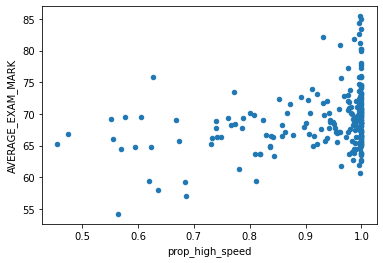

In [13]:
merged.plot.scatter(x="prop_high_speed", y="AVERAGE_EXAM_MARK")

The spread here is problematic. Most schools have really good connection speeds, but the exam marks are still spread pretty wildly around the 1.0 mark. The regression might show significance because bandwidth speeds are acting as a proxy for income levels. In low-speed areas, incomes are also generally lower as they also tend to be rural regions, so the exam marks don't reach the very highs we see in the regions with high connection speeds. To test this suspicion, income data is added.

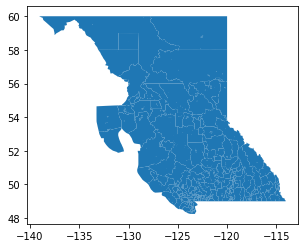

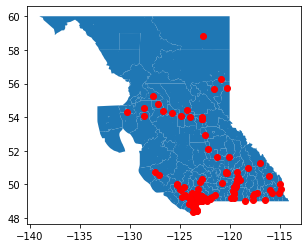

In [14]:
%run ./income_school_link.ipynb

In [19]:
merged_with_income = merged.merge(school_income_mapping, left_on="SCHOOL_NUMBER", right_on="SCHOOL_NUMBER")
merged_with_income = merged_with_income.astype(dtype={"MEDIAN_INCOME": "int64"})
merged_with_income["LOG_MEDIAN_INCOME"] = np.log(merged_with_income["MEDIAN_INCOME"])

In [26]:
pd.set_option("display.precision", 3)
merged_with_income[["AVERAGE_EXAM_MARK", "PERCENT_ESL", "PERCENT_SPECIAL_NEEDS", "type_Public", "LOG_MEDIAN_INCOME"]].describe()

,AVERAGE_EXAM_MARK,PERCENT_ESL,PERCENT_SPECIAL_NEEDS,type_Public,LOG_MEDIAN_INCOME
count,235.000,235.000,235.000,235.000,235.000
mean,69.148,3.380,11.887,0.843,11.186
std,4.838,4.283,4.780,0.365,0.176
min,54.200,0.000,0.000,0.000,10.672
25%,66.300,0.150,8.900,1.000,11.086
50%,68.600,1.900,11.500,1.000,11.191
75%,71.650,5.100,14.650,1.000,11.290
max,85.400,21.400,29.100,1.000,11.612


In [36]:
X = merged_with_income[["PERCENT_SPECIAL_NEEDS", "LOG_MEDIAN_INCOME"]]
Y = merged_with_income[["AVERAGE_EXAM_MARK"]]
#X = sm.add_constant(X)
results = sm.GLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:      AVERAGE_EXAM_MARK   R-squared (uncentered):                   0.996
Model:                            GLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.223e+04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                   2.18e-285
Time:                        22:34:52   Log-Likelihood:                         -668.46
No. Observations:                 235   AIC:                                      1341.
Df Residuals:                     233   BIC:                                      1348.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PERCENT_SPECIAL_NEEDS    -0.5639      0.057     -9.897      0.000      -0.676      -0.452
LOG_MEDIAN_INCOME         6.7787      0.065    103.921      0.000       6.650       6.907
==============================================================================
Omnibus:                       21.510   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.994
Skew:                           0.550   Prob(JB):                     4.15e-08
Kurtosis:                       4.504   Cond. No.                         5.21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
merged_with_income["LOG_MEDIAN_INCOME"].corr(merged_with_income["PERCENT_SPECIAL_NEEDS"])

-0.05394379604743072

<AxesSubplot:xlabel='LOG_MEDIAN_INCOME', ylabel='AVERAGE_EXAM_MARK'>

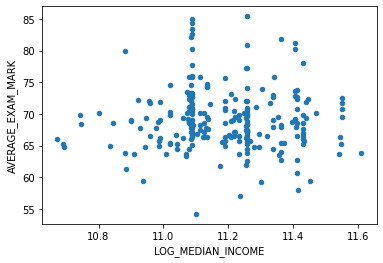

In [20]:
merged_with_income.plot.scatter(x="LOG_MEDIAN_INCOME", y="AVERAGE_EXAM_MARK")

In [30]:
X = merged_with_income[["combined_25_5", "combined_50_10", "combined_5_1", "combined_10_2", "type_Public", "PERCENT_ESL", "PERCENT_SPECIAL_NEEDS", "LOG_MEDIAN_INCOME"]]
Y = merged_with_income[["AVERAGE_EXAM_MARK"]]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      AVERAGE_EXAM_MARK   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     28.97
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           7.79e-31
Time:                        22:25:09   Log-Likelihood:                -620.49
No. Observations:                 235   AIC:                             1259.
Df Residuals:                     226   BIC:                             1290.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   100.5012     15.116      6.649      0.000      70.715     130.287
combined_25_5             1.4663      6.123      0.239      0.811     -10.600      13.532
combined_50_10            5.7003      4.204      1.356      0.176      -2.583      13.984
combined_5_1              4.4741      6.523      0.686      0.493      -8.379      17.327
combined_10_2            -0.9932      7.542     -0.132      0.895     -15.856      13.869
type_Public              -5.2744      0.746     -7.070      0.000      -6.744      -3.804
PERCENT_ESL              -0.1317      0.057     -2.309      0.022      -0.244      -0.019
PERCENT_SPECIAL_NEEDS    -0.3152      0.059     -5.329      0.000      -0.432      -0.199
LOG_MEDIAN_INCOME        -2.4966      1.376     -1.815      0.071      -5.207       0.214
==============================================================================
Omnibus:                        3.417   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                3.910
Skew:                           0.055   Prob(JB):                        0.142
Kurtosis:                       3.622   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Testing weighted averages -- not complete yet

test = pop_regions_with_dummies.groupby(["SCHOOL_NUMBER"])["Pop2016"].sum().reset_index().rename(columns={"Pop2016": "Pop_Sum"})

sum_merged = pop_regions_with_dummies.merge(test)
sum_merged["pop_weight"] = sum_merged["Pop2016"] / sum_merged["Pop_Sum"]
sum_merged

,Unnamed: 0,PHH_ID,Type,Pop2016,TDwell2016_TLog2016,URDwell2016_RH2016,DBUID_Ididu,HEXUID_IdUHEX,Pruid_Pridu,Latitude,...,Avail_LTE_Mobile_Dispo,DISTANCE,SCHOOL_NUMBER,combined_10_2,combined_25_5,combined_50_10,combined_5_1,combined_<5_1,Pop_Sum,pop_weight
0,12976,4966173,3,3.875229,1.365138,1.188991,59150968013,BC49251232,59,49.257718,...,1,0.988530,3939006,0,0,1,0,0,46244.010339,0.000084
1,12977,4957793,4,21.000000,9.000000,7.750000,59150591005,BC49251232,59,49.257987,...,1,0.972418,3939006,0,0,1,0,0,46244.010339,0.000454
2,16606,5061857,3,40.000000,22.888889,22.000000,59153686028,BC49281231,59,49.270179,...,1,1.888054,3939006,0,0,1,0,0,46244.010339,0.000865
3,16607,4958630,4,12.400000,8.000000,7.600000,59150630016,BC49281231,59,49.270145,...,1,1.859751,3939006,0,0,1,0,0,46244.010339,0.000268
4,16789,4958704,5,6.031250,3.937500,3.562500,59150630035,BC49281231,59,49.267728,...,1,1.894092,3939006,0,0,1,0,0,46244.010339,0.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397592,599882,5067714,4,14.796460,5.309735,5.097345,59153774011,BC49051226,59,49.057297,...,1,3.481729,3596311,0,0,1,0,0,2773.129523,0.005336
397593,604036,5067672,6,13.113402,4.701031,4.391753,59153773006,BC49051226,59,49.061570,...,1,3.057828,3596311,0,0,1,0,0,2773.129523,0.004729
397594,604037,5067721,5,5.548673,1.991150,1.911504,59153774011,BC49051226,59,49.063243,...,1,2.869669,3596311,0,0,1,0,0,2773.129523,0.002001
397595,605956,5067729,5,12.307692,5.000000,4.102564,59153774012,BC49101226,59,49.080786,...,1,1.037161,3596311,0,0,1,0,0,2773.129523,0.004438


In [45]:
conversion = {"25_5": 3, "50_10": 4, "5_1": 1, "10_2": 2, "<5_1": 0}
pop_regions_filtered["encoded_speeds"] = pop_regions_filtered["Combined_Max_Threshold-Combine_Seuil_Max"].map(conversion)
pop_regions_filtered_map_columns = pop_regions_filtered[["HEXUID_IdUHEX", "Latitude", "Longitude", "encoded_speeds"]]

/tmp/ipykernel_5319/2056725693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_regions_filtered["encoded_speeds"] = pop_regions_filtered["Combined_Max_Threshold-Combine_Seuil_Max"].map(conversion)


<AxesSubplot:>

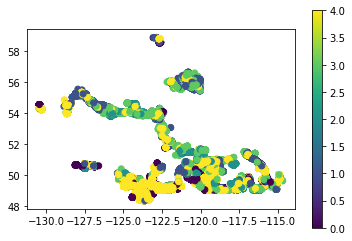

In [46]:
gdf = geopandas.GeoDataFrame(
    pop_regions_filtered_map_columns, geometry=geopandas.points_from_xy(pop_regions_filtered_map_columns.Longitude, pop_regions_filtered_map_columns.Latitude))
gdf.plot("encoded_speeds", legend=True)

In [47]:
pop_regions_secondary = pd.read_csv("pop_regions_with_school_secondary.csv")
# Dropping hexes that are assigned to schools more than 50 kilometres away. While it's conceivable that students would travel 50km if it is the closest school, I want to avoid the case where such distances 
# causes parents to home school instead or send kids to some equivalent schooling that is not reflected in this data. 
pop_regions_filtered_secondary = pop_regions_secondary[pop_regions["DISTANCE"] < 50]
pop_regions_with_dummies_secondary = pd.get_dummies(pop_regions_filtered_secondary, columns=["Combined_Max_Threshold-Combine_Seuil_Max"], prefix="combined")
pop_regions_with_dummies_secondary

,Unnamed: 0,PHH_ID,Type,Pop2016,TDwell2016_TLog2016,URDwell2016_RH2016,DBUID_Ididu,HEXUID_IdUHEX,Pruid_Pridu,Latitude,...,Wired_Max_Threshold-Filaire_Seuil_Max,Wireless_Max_Threshold-Sans_fil_Seuil_Max,Avail_LTE_Mobile_Dispo,DISTANCE,SCHOOL_NUMBER,combined_10_2,combined_25_5,combined_50_10,combined_5_1,combined_<5_1
0,12976,4966173,3,3.875,1.365,1.189,59150968013,BC49251232,59,49.258,...,50_10,5_1,1,0.989,3939006,0,0,1,0,0
1,12977,4957793,4,21.000,9.000,7.750,59150591005,BC49251232,59,49.258,...,50_10,5_1,1,0.972,3939006,0,0,1,0,0
2,12978,5015696,3,8.061,4.965,4.670,59152437024,BC49231226,59,49.214,...,50_10,NaN,1,1.532,4242038,0,0,1,0,0
3,12979,5015622,4,27.385,16.751,16.386,59152436001,BC49231226,59,49.214,...,50_10,NaN,1,1.502,4242038,0,0,1,0,0
4,12980,5115114,3,19.384,7.698,7.540,59170731001,BC48591234,59,48.591,...,50_10,NaN,1,1.532,6363020,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420586,661348,5500963,2,7.049,11.311,3.770,59030228033,BC49461168,59,49.470,...,5_1,<5_1,1,36.526,807013,0,0,0,1,0
420589,661351,5500966,2,5.075,2.888,2.275,59030137019,BC49931174,59,49.905,...,NaN,NaN,1,32.370,886018,0,0,0,0,0
420590,661353,5500968,2,4.069,4.069,1.908,59070135043,BC49611204,59,49.618,...,NaN,<5_1,0,19.329,5817008,0,0,0,0,1
420592,661355,5500970,2,1.159,0.381,0.381,59070148002,BC49231200,59,49.223,...,NaN,25_5,1,11.143,5316004,0,1,0,0,0


## Robustness

In [52]:
exam_info = pd.read_csv("raw/provincial-required-examinations-2016_2017_to_2019_2020.csv")
exam_info = exam_info[exam_info["SCHOOL_YEAR"] == "2018/2019"]
exam_info = exam_info[exam_info["DATA_LEVEL"] == "School Level"]
exam_info = exam_info[exam_info["EXAM_SUBJECT"] == "ENGLISH 12"]
exam_info = exam_info[exam_info["SUB_POPULATION"] == "All Students"]
exam_info = exam_info[exam_info["MARK_TYPE"] == "Exam Marks"]
per_school = exam_info.groupby("SCHOOL_NUMBER").first()
unmasked = per_school[per_school["AVERAGE_PERCENT"] != "Msk"]

schools = pd.read_csv("raw/allschools_databc_20201027-fewer-columns.csv")
schools = schools[["SCHOOL_NUMBER", "SCHOOL_LATITUDE", "SCHOOL_LONGITUDE"]]
unmasked_with_location = unmasked.merge(schools, left_on="SCHOOL_NUMBER", right_on="SCHOOL_NUMBER")
unmasked_with_location = pd.get_dummies(unmasked_with_location, columns=["PUBLIC_OR_INDEPENDENT"], prefix="type", drop_first=True)
unmasked_with_location.columns

Index(['SCHOOL_NUMBER', 'SCHOOL_YEAR', 'DATA_LEVEL', 'DISTRICT_NUMBER',
       'DISTRICT_NAME', 'SCHOOL_NAME', 'FACILITY_TYPE', 'SUBJECT_CATEGORY',
       'EXAM_SUBJECT', 'COURSE_CODE', 'GRADE', 'SUB_POPULATION',
       'REQUIRED_OR_OPTIONAL', 'MARK_TYPE', 'NUMBER_OF_MARKS',
       'AVERAGE_PERCENT', 'SUM_OF_MARKS', 'NUMBER_OF_C_MINUS_OR_BETTER',
       'PERCENT_OF_C_MINUS_OR_BETTER', 'NUMBER_OF_A', 'PERCENT_OF_A',
       'NUMBER_OF_B', 'PERCENT_OF_B', 'NUMBER_OF_C_PLUS', 'PERCENT_OF_C_PLUS',
       'NUMBER_OF_C', 'PERCENT_OF_C', 'NUMBER_OF_C_MINUS',
       'PERCENT_OF_C_MINUS', 'NUMBER_OF_F', 'PERCENT_OF_F', 'SCHOOL_LATITUDE',
       'SCHOOL_LONGITUDE', 'type_BC Public School'],
      dtype='object')

In [53]:
census_boundaries = geopandas.read_file("raw/lcsd000a16a_e.shp")
census_boundaries_bc = census_boundaries[census_boundaries["PRUID"] == "59"]
census_boundaries_bc = census_boundaries_bc.to_crs(epsg=4326)

In [54]:
school_gdf_secondary = geopandas.GeoDataFrame(unmasked_with_location, geometry=geopandas.points_from_xy(unmasked_with_location.SCHOOL_LONGITUDE, unmasked_with_location.SCHOOL_LATITUDE))
school_gdf_secondary = school_gdf_secondary.set_crs(epsg=4326)
school_gdf_secondary["CENSUS_ID"] = ""

for index, school in school_gdf_secondary.iterrows():
    for i, census_sub in census_boundaries_bc.iterrows():
        if school.geometry.within(census_sub.geometry):
            school_gdf_secondary.loc[index, "CENSUS_ID"] = census_sub["CSDUID"]

In [55]:
income_data = pd.read_csv("raw/income_2016_census.csv")
income_data_subdivision = income_data[income_data["GEO_LEVEL"] == 3]
income_data_subdivision = income_data_subdivision[income_data_subdivision["Member ID: Household type including census family structure (11)"] == 1]
school_gdf_secondary = school_gdf_secondary.astype(dtype={"CENSUS_ID": "int64"})
school_income_mapping_secondary = school_gdf_secondary[["SCHOOL_NUMBER", "CENSUS_ID"]].merge(income_data_subdivision[["GEO_CODE (POR)", "Dim: Household income statistics (3): Member ID: [2]: Median total income of households ($)"]], left_on="CENSUS_ID", right_on="GEO_CODE (POR)")
school_income_mapping_secondary = school_income_mapping_secondary.drop("GEO_CODE (POR)", axis=1)
school_income_mapping_secondary = school_income_mapping_secondary.rename(columns={"Dim: Household income statistics (3): Member ID: [2]: Median total income of households ($)": "MEDIAN_INCOME"})

In [61]:
pop_regions_secondary = pd.read_csv("pop_regions_with_school_secondary.csv")
# Dropping hexes that are assigned to schools more than 50 kilometres away. While it's conceivable that students would travel 50km if it is the closest school, I want to avoid the case where such distances 
# causes parents to home school instead or send kids to some equivalent schooling that is not reflected in this data. 
pop_regions_secondary = pop_regions_secondary[pop_regions_secondary["DISTANCE"] < 50]
pop_regions_secondary = pd.get_dummies(pop_regions_secondary, columns=["Combined_Max_Threshold-Combine_Seuil_Max"], prefix="combined")

mean_combined_speed_secondary = pop_regions_secondary.groupby(["SCHOOL_NUMBER"])["combined_25_5", "combined_50_10", "combined_5_1", "combined_10_2", "combined_<5_1"].mean().reset_index()


merged_secondary = unmasked_with_location.merge(mean_combined_speed_secondary, left_on="SCHOOL_NUMBER", right_on="SCHOOL_NUMBER")
merged_secondary["prop_high_speed"] = merged_secondary["combined_50_10"] + merged_secondary["combined_25_5"]


/tmp/ipykernel_5319/1400524100.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_combined_speed_secondary = pop_regions_secondary.groupby(["SCHOOL_NUMBER"])["combined_25_5", "combined_50_10", "combined_5_1", "combined_10_2", "combined_<5_1"].mean().reset_index()


In [62]:
merged_with_income_secondary = merged_secondary.merge(school_income_mapping_secondary, left_on="SCHOOL_NUMBER", right_on="SCHOOL_NUMBER")
merged_with_income_secondary = merged_with_income_secondary.astype(dtype={"MEDIAN_INCOME": "int64"})
merged_with_income_secondary["LOG_MEDIAN_INCOME"] = np.log(merged_with_income_secondary["MEDIAN_INCOME"])
merged_with_income_secondary.to_csv("temp1.csv")